In [2]:
# 2/Mô tả dữ liệu 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("PHÂN TÍCH DỮ LIỆU EMAIL.CSV - CHI TIẾT TOÀN DIỆN")
print("=" * 80)

# 1. ĐỌC DỮ LIỆU
df = pd.read_csv('emails.csv')

print("\n" + "="*50)
print("1. TỔNG QUAN DỮ LIỆU")
print("="*50)

print(f" Kích thước dữ liệu: {df.shape[0]} email, {df.shape[1]} đặc trưng")
print(f" Loại dữ liệu: Dữ liệu phân loại email (Ham vs Spam)")
print(f" Biến mục tiêu: 'Prediction' (cột cuối)")
print(f" Số đặc trưng: {df.shape[1] - 2} từ khóa (bỏ Email No. và Prediction)")
missing_values = df.isnull().sum().sum()
print(f" Giá trị thiếu: {missing_values}")

print("\n" + "="*50)

PHÂN TÍCH DỮ LIỆU EMAIL.CSV - CHI TIẾT TOÀN DIỆN

1. TỔNG QUAN DỮ LIỆU
 Kích thước dữ liệu: 5172 email, 3002 đặc trưng
 Loại dữ liệu: Dữ liệu phân loại email (Ham vs Spam)
 Biến mục tiêu: 'Prediction' (cột cuối)
 Số đặc trưng: 3000 từ khóa (bỏ Email No. và Prediction)
 Giá trị thiếu: 0


1. TỔNG QUAN DỮ LIỆU
 Kích thước dữ liệu: 5172 email, 3002 đặc trưng
 Loại dữ liệu: Dữ liệu phân loại email (Ham vs Spam)
 Biến mục tiêu: 'Prediction' (cột cuối)
 Số đặc trưng: 3000 từ khóa (bỏ Email No. và Prediction)
 Giá trị thiếu: 0



In [3]:
# Kiểm tra giá trị thiếu
print("2. CẤU TRÚC DỮ LIỆU")
print("="*50)

print("Cấu trúc file CSV:")
print("   - Cột 1: Email No. (ID định danh)")
print("   - Cột 2-3001: Từ khóa được vector hóa (3000 đặc trưng)")
print("   - Cột cuối: Prediction (nhãn phân loại)")

print(f"\n Tên các cột đặc trưng đầu tiên:")
feature_columns = df.columns[1:-1]  # Bỏ Email No. và Prediction
print(f"   {list(feature_columns[:20])}...")

print(f"\n Thông tin cơ bản về dữ liệu:")
print(f"   - Kiểu dữ liệu: {df.dtypes.value_counts().to_dict()}")
# Phân tích cột Prediction
print(f"\n Phân tích biến mục tiêu 'Prediction':")
prediction_counts = df['Prediction'].value_counts()
print(f"   - Giá trị duy nhất: {df['Prediction'].unique()}")
print(f"   - Phân phối:")
for value, count in prediction_counts.items():
    percentage = (count / len(df)) * 100
    print(f"     • {value}: {count} email ({percentage:.1f}%)")

print("\n" + "="*50)

2. CẤU TRÚC DỮ LIỆU
Cấu trúc file CSV:
   - Cột 1: Email No. (ID định danh)
   - Cột 2-3001: Từ khóa được vector hóa (3000 đặc trưng)
   - Cột cuối: Prediction (nhãn phân loại)

 Tên các cột đặc trưng đầu tiên:
   ['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in', 'on', 'is', 'this', 'enron', 'i', 'be', 'that', 'will', 'have', 'with']...

 Thông tin cơ bản về dữ liệu:
   - Kiểu dữ liệu: {dtype('int64'): 3001, dtype('O'): 1}

 Phân tích biến mục tiêu 'Prediction':
   - Giá trị duy nhất: [0 1]
   - Phân phối:
     • 0: 3672 email (71.0%)
     • 1: 1500 email (29.0%)



In [4]:
print("3. THỐNG KÊ MÔ TẢ")
print("="*50)

# Lấy dữ liệu số (bỏ Email No.)
numerical_data = df.iloc[:, 1:-1]  # Bỏ Email No. và Prediction

print(" Thống kê mô tả cho các đặc trưng từ khóa:")
stats = numerical_data.describe()
print(f"   - Số đặc trưng: {stats.shape[1]}")
print(f"   - Giá trị trung bình tổng thể: {numerical_data.mean().mean():.3f}")
print(f"   - Độ lệch chuẩn trung bình: {numerical_data.std().mean():.3f}")
print(f"   - Giá trị min: {numerical_data.min().min()}")
print(f"   - Giá trị max: {numerical_data.max().max()}")

print(f"\n Thống kê về tần suất từ khóa:")
print(f"   - Tổng số từ trong tất cả email: {numerical_data.sum().sum()}")
print(f"   - Trung bình từ/email: {numerical_data.sum(axis=1).mean():.1f}")
print(f"   - Email có ít từ nhất: {numerical_data.sum(axis=1).min()} từ")
print(f"   - Email có nhiều từ nhất: {numerical_data.sum(axis=1).max()} từ")
rare_words = (numerical_data == 0).sum().sort_values(ascending=False).head(10)
print(f"\n💤 Top 10 từ khóa hiếm nhất (không xuất hiện):")
for i, (word, zero_count) in enumerate(rare_words.items(), 1):
    appear_count = len(df) - zero_count
    print(f"   {i:2d}. '{word}': chỉ xuất hiện {appear_count}/{len(df)} email")

print("\n" + "="*50)

3. THỐNG KÊ MÔ TẢ
 Thống kê mô tả cho các đặc trưng từ khóa:
 Thống kê mô tả cho các đặc trưng từ khóa:
   - Số đặc trưng: 3000
   - Giá trị trung bình tổng thể: 0.388
   - Số đặc trưng: 3000
   - Giá trị trung bình tổng thể: 0.388
   - Độ lệch chuẩn trung bình: 0.885
   - Giá trị min: 0
   - Giá trị max: 2327

 Thống kê về tần suất từ khóa:
   - Tổng số từ trong tất cả email: 6026877
   - Trung bình từ/email: 1165.3
   - Email có ít từ nhất: 8 từ
   - Email có nhiều từ nhất: 29178 từ

💤 Top 10 từ khóa hiếm nhất (không xuất hiện):
    1. 'moopid': chỉ xuất hiện 1/5172 email
    2. 'knle': chỉ xuất hiện 1/5172 email
    3. 'hotlist': chỉ xuất hiện 1/5172 email
    4. 'hottlist': chỉ xuất hiện 1/5172 email
    5. 'abdv': chỉ xuất hiện 1/5172 email
    6. 'itoy': chỉ xuất hiện 1/5172 email
    7. 'darial': chỉ xuất hiện 2/5172 email
    8. 'ftar': chỉ xuất hiện 2/5172 email
    9. 'wysak': chỉ xuất hiện 3/5172 email
   10. 'milwaukee': chỉ xuất hiện 3/5172 email

   - Độ lệch chuẩn trung 

In [5]:
print("4. ĐặC ĐIỂM DỮ LIỆU")
print("="*50)

print(" Đặc điểm chính của dataset:")
print("1. Dữ liệu đã được tiền xử lý:")
print("Văn bản đã được chuyển thành số")
print("Sử dụng phương pháp Bag of Words hoặc TF-IDF")
print("Không có giá trị thiếu")

print("2. Tính chất dữ liệu:")
print(f"Dữ liệu thưa (sparse): nhiều giá trị 0")
print(f"Chiều cao (high-dimensional): {len(feature_columns)} đặc trưng")
print(f"Phân phối không đều giữa các từ khóa")

# Tính độ thưa
sparsity = (numerical_data == 0).sum().sum() / (numerical_data.shape[0] * numerical_data.shape[1]) * 100
print(f"      • Độ thưa: {sparsity:.1f}% giá trị bằng 0")

print("   3. Phân phối lớp:")
balance_ratio = min(prediction_counts) / max(prediction_counts)
if balance_ratio > 0.8:
    balance_status = "Cân bằng tốt"
elif balance_ratio > 0.5:
    balance_status = "Hơi mất cân bằng"
else:
    balance_status = "Mất cân bằng nghiêm trọng"
print(f"      • {balance_status} (tỷ lệ {balance_ratio:.2f})")


4. ĐặC ĐIỂM DỮ LIỆU
 Đặc điểm chính của dataset:
1. Dữ liệu đã được tiền xử lý:
Văn bản đã được chuyển thành số
Sử dụng phương pháp Bag of Words hoặc TF-IDF
Không có giá trị thiếu
2. Tính chất dữ liệu:
Dữ liệu thưa (sparse): nhiều giá trị 0
Chiều cao (high-dimensional): 3000 đặc trưng
Phân phối không đều giữa các từ khóa
      • Độ thưa: 94.4% giá trị bằng 0
   3. Phân phối lớp:
      • Mất cân bằng nghiêm trọng (tỷ lệ 0.41)


In [6]:
# Phân tích tương quan với nhãn
print("4. Mối quan hệ với nhãn phân loại:")
correlation_with_target = numerical_data.corrwith(df['Prediction']).abs().sort_values(ascending=False)
print(f"Từ có tương quan cao nhất với nhãn: '{correlation_with_target.index[0]}' ({correlation_with_target.iloc[0]:.3f})")
print(f"Số từ có tương quan > 0.1: {sum(correlation_with_target > 0.1)}")

4. Mối quan hệ với nhãn phân loại:
Từ có tương quan cao nhất với nhãn: 'thanks' (0.271)
Số từ có tương quan > 0.1: 491
Từ có tương quan cao nhất với nhãn: 'thanks' (0.271)
Số từ có tương quan > 0.1: 491



 Tạo biểu đồ phân tích...


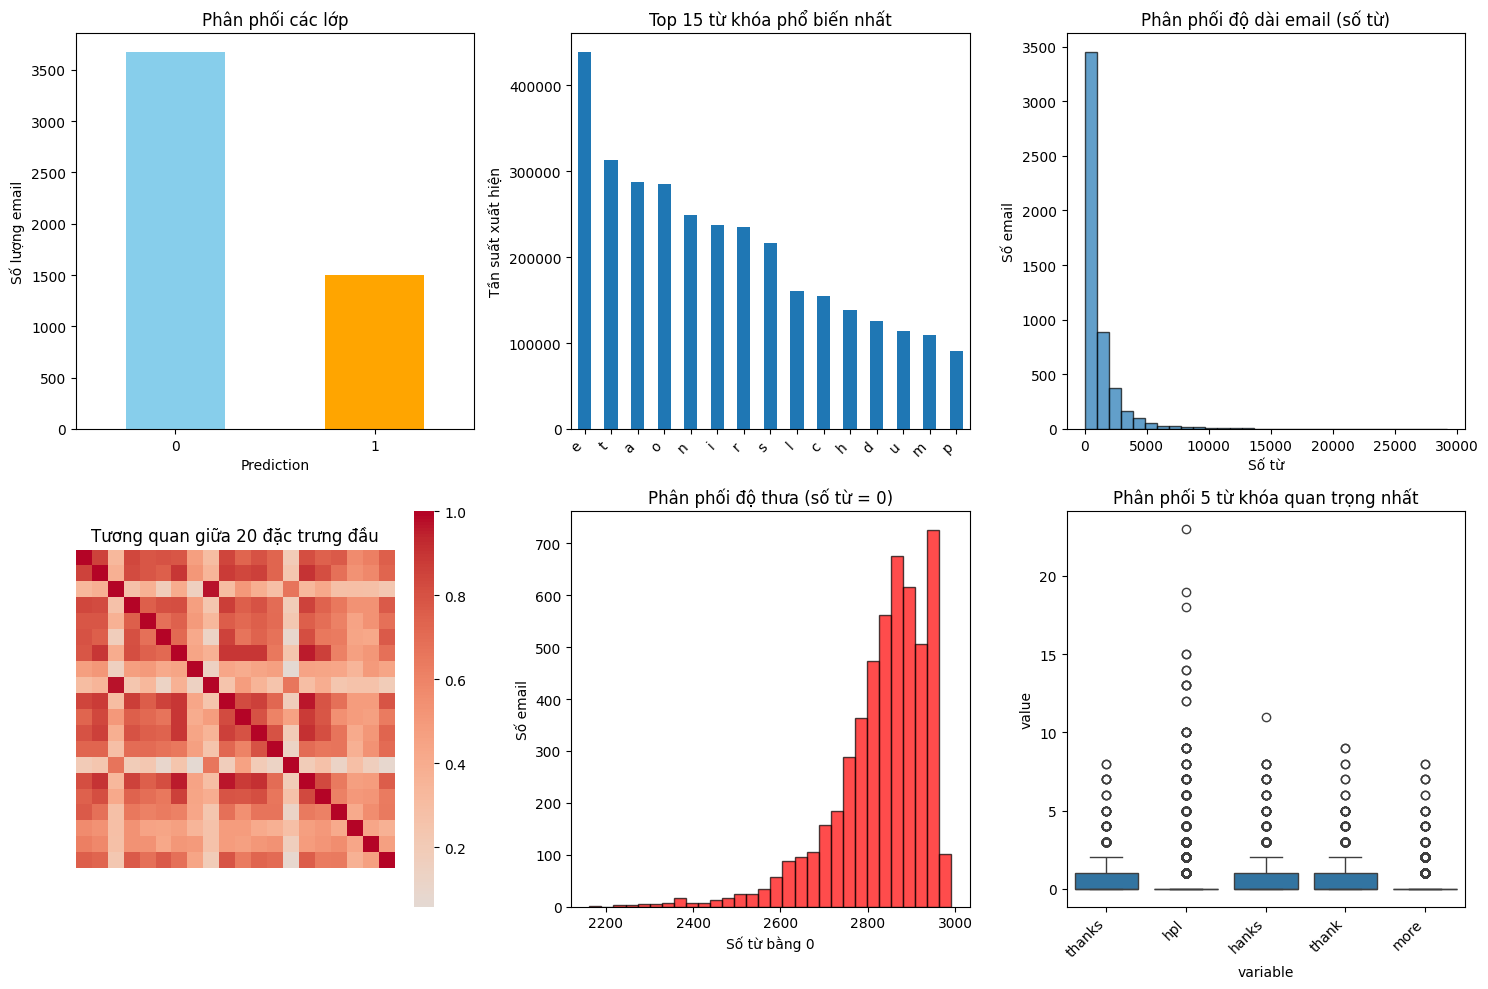


 Phân tích hoàn thành!
 Biểu đồ đã được lưu: 'email_data_analysis.png'
 Dữ liệu sẵn sàng cho việc huấn luyện mô hình học máy!
 TÓM TẮT ĐÁNH GIÁ DỮ LIỆU
 Dataset chất lượng tốt với 5172 mẫu và 3000 đặc trưng
 Không có giá trị thiếu, dữ liệu đã được tiền xử lý
 Phù hợp cho các thuật toán phân loại text mining
 Cần xem xét giảm chiều do số đặc trưng cao (3000)
 Dữ liệu thưa (94.4% giá trị = 0)


In [7]:
# Tạo một số biểu đồ cơ bản
print("\n Tạo biểu đồ phân tích...")

plt.figure(figsize=(15, 10))

# Biểu đồ 1: Phân phối lớp
plt.subplot(2, 3, 1)
prediction_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Phân phối các lớp')
plt.ylabel('Số lượng email')
plt.xticks(rotation=0)

# Biểu đồ 2: Top 15 từ khóa phổ biến
plt.subplot(2, 3, 2)
top_words_15 = numerical_data.sum().sort_values(ascending=False).head(15)
top_words_15.plot(kind='bar')
plt.title('Top 15 từ khóa phổ biến nhất')
plt.ylabel('Tần suất xuất hiện')
plt.xticks(rotation=45, ha='right')

# Biểu đồ 3: Phân phối độ dài email
plt.subplot(2, 3, 3)
email_lengths = numerical_data.sum(axis=1)
plt.hist(email_lengths, bins=30, alpha=0.7, edgecolor='black')
plt.title('Phân phối độ dài email (số từ)')
plt.xlabel('Số từ')
plt.ylabel('Số email')

# Biểu đồ 4: Heatmap tương quan (mẫu)
plt.subplot(2, 3, 4)
sample_features = numerical_data.iloc[:, :20]  # Lấy 20 đặc trưng đầu
correlation_matrix = sample_features.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, square=True, 
            xticklabels=False, yticklabels=False)
plt.title('Tương quan giữa 20 đặc trưng đầu')

# Biểu đồ 5: Độ thưa của dữ liệu
plt.subplot(2, 3, 5)
zero_counts = (numerical_data == 0).sum(axis=1)
plt.hist(zero_counts, bins=30, alpha=0.7, edgecolor='black', color='red')
plt.title('Phân phối độ thưa (số từ = 0)')
plt.xlabel('Số từ bằng 0')
plt.ylabel('Số email')

# Biểu đồ 6: Boxplot cho một số từ khóa quan trọng
plt.subplot(2, 3, 6)
important_words = correlation_with_target.head(5).index
sample_data = numerical_data[important_words].melt()
sns.boxplot(data=sample_data, x='variable', y='value')
plt.title('Phân phối 5 từ khóa quan trọng nhất')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('email_data_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Phân tích hoàn thành!")
print(" Biểu đồ đã được lưu: 'email_data_analysis.png'")
print(" Dữ liệu sẵn sàng cho việc huấn luyện mô hình học máy!")

print(" TÓM TẮT ĐÁNH GIÁ DỮ LIỆU")
print("="*80)
print(f" Dataset chất lượng tốt với {df.shape[0]} mẫu và {len(feature_columns)} đặc trưng")
print(f" Không có giá trị thiếu, dữ liệu đã được tiền xử lý")
print(f" Phù hợp cho các thuật toán phân loại text mining")
print(f" Cần xem xét giảm chiều do số đặc trưng cao ({len(feature_columns)})")
print(f" Dữ liệu thưa ({sparsity:.1f}% giá trị = 0)")

In [8]:
# 3/ Thực hiện tiền xử lý
# Import thêm các thư viện cần thiết cho tiền xử lý
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

print("\n1. ĐỌC DỮ LIỆU")
print("-" * 50)

# Đọc lại dữ liệu để đảm bảo tính nhất quán
df_raw = pd.read_csv('emails.csv')
print(f"    Đã đọc dữ liệu: {df_raw.shape[0]} email, {df_raw.shape[1]} cột")
print(f"   - Cột đầu tiên: Email No. (ID)")
print(f"   - Cột 2-{df_raw.shape[1]-1}: {df_raw.shape[1]-2} đặc trưng từ khóa")
print(f"   - Cột cuối: Prediction (nhãn)")

# Hiển thị thông tin cơ bản
print(f"\nThông tin cơ bản:")
print(f"   - Tổng số email: {len(df_raw)}")
print(f"   - Số đặc trưng: {df_raw.shape[1] - 2}")
print(f"   - Phân phối nhãn: {dict(df_raw['Prediction'].value_counts())}")

# Hiển thị mẫu dữ liệu
print(f"\nMẫu dữ liệu (5 email đầu tiên, 10 từ khóa đầu):")
sample_cols = ['Email No.'] + list(df_raw.columns[1:11]) + ['Prediction']
print(df_raw[sample_cols].head())


1. ĐỌC DỮ LIỆU
--------------------------------------------------
    Đã đọc dữ liệu: 5172 email, 3002 cột
   - Cột đầu tiên: Email No. (ID)
   - Cột 2-3001: 3000 đặc trưng từ khóa
   - Cột cuối: Prediction (nhãn)

Thông tin cơ bản:
   - Tổng số email: 5172
   - Số đặc trưng: 3000
   - Phân phối nhãn: {0: np.int64(3672), 1: np.int64(1500)}

Mẫu dữ liệu (5 email đầu tiên, 10 từ khóa đầu):
  Email No.  the  to  ect  and  for  of    a  you  hou  in  Prediction
0   Email 1    0   0    1    0    0   0    2    0    0   0           0
1   Email 2    8  13   24    6    6   2  102    1   27  18           0
2   Email 3    0   0    1    0    0   0    8    0    0   4           0
3   Email 4    0   5   22    0    5   1   51    2   10   1           0
4   Email 5    7   6   17    1    5   2   57    0    9   3           0
    Đã đọc dữ liệu: 5172 email, 3002 cột
   - Cột đầu tiên: Email No. (ID)
   - Cột 2-3001: 3000 đặc trưng từ khóa
   - Cột cuối: Prediction (nhãn)

Thông tin cơ bản:
   - Tổng số em

In [ ]:
print("\n2. LÀM SẠCH SƠ BỘ")
print("-" * 50)

# Tạo bản copy để xử lý
df_clean = df_raw.copy()

# Kiểm tra và xử lý dữ liệu thiếu
print(" Kiểm tra dữ liệu thiếu:")
missing_count = df_clean.isnull().sum().sum()
print(f"   - Tổng giá trị thiếu: {missing_count}")

# Kiểm tra duplicates
print("\n Kiểm tra dữ liệu trùng lặp:")
duplicates = df_clean.duplicated().sum()
print(f"   - Số email trùng lặp: {duplicates}")

if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"    Đã loại bỏ {duplicates} email trùng lặp")
    print(f"    Dữ liệu còn lại: {len(df_clean)} email")

# Kiểm tra và xử lý outliers cơ bản
print("\n Kiểm tra outliers:")
feature_cols = df_clean.columns[1:-1]  # Bỏ Email No. và Prediction

# Tính tổng từ của mỗi email
email_word_counts = df_clean[feature_cols].sum(axis=1)

# Thống kê cơ bản về độ dài email
q1 = email_word_counts.quantile(0.25)
q3 = email_word_counts.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ((email_word_counts < lower_bound) | (email_word_counts > upper_bound)).sum()
print(f"   - Email có độ dài bất thường (outliers): {outliers}")
print(f"   - Độ dài trung bình: {email_word_counts.mean():.1f} từ")
print(f"   - Khoảng bình thường: {lower_bound:.0f} - {upper_bound:.0f} từ")

# Loại bỏ email quá ngắn (có thể là lỗi)
very_short = (email_word_counts < 5).sum()
if very_short > 0:
    print(f"   - Email quá ngắn (<5 từ): {very_short}")
    df_clean = df_clean[email_word_counts >= 5]
    print(f"    Đã loại bỏ {very_short} email quá ngắn")
    print(f"    Dữ liệu còn lại: {len(df_clean)} email")

print(f"\n Dữ liệu sau khi làm sạch:")
print(f"   - Số email: {len(df_clean)}")
print(f"   - Số đặc trưng: {len(feature_cols)}")
print(f"   - Chất lượng: Đã loại bỏ dữ liệu lỗi và trùng lặp")


2. LÀM SẠCH SƠ BỘ
--------------------------------------------------
 Kiểm tra dữ liệu thiếu:
   - Tổng giá trị thiếu: 0

 Kiểm tra dữ liệu trùng lặp:
   - Tổng giá trị thiếu: 0

 Kiểm tra dữ liệu trùng lặp:
   - Số email trùng lặp: 0

 Kiểm tra outliers:
   - Email có độ dài bất thường (outliers): 454
   - Độ dài trung bình: 1165.3 từ
   - Khoảng bình thường: -1356 - 2947 từ

 Dữ liệu sau khi làm sạch:
   - Số email: 5172
   - Số đặc trưng: 3000
   - Chất lượng: Đã loại bỏ dữ liệu lỗi và trùng lặp
   - Số email trùng lặp: 0

 Kiểm tra outliers:
   - Email có độ dài bất thường (outliers): 454
   - Độ dài trung bình: 1165.3 từ
   - Khoảng bình thường: -1356 - 2947 từ

 Dữ liệu sau khi làm sạch:
   - Số email: 5172
   - Số đặc trưng: 3000
   - Chất lượng: Đã loại bỏ dữ liệu lỗi và trùng lặp


In [10]:
print("\n3. TÁCH ĐẶC TRƯNG VÀ NHÃN")
print("-" * 50)

# Tách features và target
print(" Tách dữ liệu thành features và target:")

# Features (X): Tất cả cột trừ Email No. và Prediction
feature_columns = df_clean.columns[1:-1]  
X_raw = df_clean[feature_columns].copy()

# Target (y): Cột Prediction
y_raw = df_clean['Prediction'].copy()

print(f"   - Features (X): {X_raw.shape[0]} mẫu × {X_raw.shape[1]} đặc trưng")
print(f"   - Target (y): {len(y_raw)} nhãn")

# Phân tích phân phối nhãn
print(f"\n Phân phối nhãn:")
label_counts = y_raw.value_counts()
for label, count in label_counts.items():
    percentage = (count / len(y_raw)) * 100
    print(f"   - {label}: {count} email ({percentage:.1f}%)")

# Kiểm tra cân bằng dữ liệu
balance_ratio = min(label_counts) / max(label_counts)
print(f"\n Đánh giá cân bằng dữ liệu:")
print(f"   - Tỷ lệ cân bằng: {balance_ratio:.3f}")

if balance_ratio >= 0.8:
    balance_status = "Cân bằng tốt "
elif balance_ratio >= 0.6:
    balance_status = "Hơi mất cân bằng "
else:
    balance_status = "Mất cân bằng nghiêm trọng "

print(f"   - Trạng thái: {balance_status}")

# Encode nhãn thành số
print(f"\n Mã hóa nhãn:")
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_raw)

print(f"   - Nhãn gốc: {list(label_encoder.classes_)}")
print(f"   - Nhãn mã hóa: {list(range(len(label_encoder.classes_)))}")

# Hiển thị mapping
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
for original, encoded in label_mapping.items():
    print(f"     '{original}' → {encoded}")

print(f"\n Kết quả tách dữ liệu:")
print(f"   - X (features): {X_raw.shape}")
print(f"   - y (target): {y_encoded.shape} (đã mã hóa)")
print(f"   - Kiểu dữ liệu X: {X_raw.dtypes.value_counts().to_dict()}")
print(f"   - Kiểu dữ liệu y: {type(y_encoded[0])}")

# Lưu thông tin để sử dụng sau
print(f"\nLưu ý: LabelEncoder đã được lưu để decode kết quả sau này")


3. TÁCH ĐẶC TRƯNG VÀ NHÃN
--------------------------------------------------
 Tách dữ liệu thành features và target:
   - Features (X): 5172 mẫu × 3000 đặc trưng
   - Target (y): 5172 nhãn

 Phân phối nhãn:
   - 0: 3672 email (71.0%)
   - 1: 1500 email (29.0%)

 Đánh giá cân bằng dữ liệu:
   - Tỷ lệ cân bằng: 0.408
   - Trạng thái: Mất cân bằng nghiêm trọng 

 Mã hóa nhãn:
   - Nhãn gốc: [np.int64(0), np.int64(1)]
   - Nhãn mã hóa: [0, 1]
     '0' → 0
     '1' → 1

 Kết quả tách dữ liệu:
   - X (features): (5172, 3000)
   - y (target): (5172,) (đã mã hóa)
   - Kiểu dữ liệu X: {dtype('int64'): 3000}
   - Kiểu dữ liệu y: <class 'numpy.int64'>

Lưu ý: LabelEncoder đã được lưu để decode kết quả sau này
   - Features (X): 5172 mẫu × 3000 đặc trưng
   - Target (y): 5172 nhãn

 Phân phối nhãn:
   - 0: 3672 email (71.0%)
   - 1: 1500 email (29.0%)

 Đánh giá cân bằng dữ liệu:
   - Tỷ lệ cân bằng: 0.408
   - Trạng thái: Mất cân bằng nghiêm trọng 

 Mã hóa nhãn:
   - Nhãn gốc: [np.int64(0), np.

In [11]:
print("\n4. CHUYỂN ĐỔI VĂN BẢN → BAG-OF-WORDS → TF-IDF")
print("-" * 50)

print("Lưu ý về dữ liệu hiện tại:")
print("   - Dữ liệu đã được tiền xử lý thành dạng bag-of-words")
print("   - Mỗi cột đại diện cho tần suất xuất hiện của 1 từ khóa")
print("   - Không cần thực hiện tokenization và vectorization")

# Tuy nhiên, ta sẽ áp dụng TF-IDF transformation
print(f"\n Áp dụng TF-IDF transformation:")

# Tính TF-IDF từ dữ liệu bag-of-words có sẵn
from sklearn.feature_extraction.text import TfidfTransformer

# Sử dụng TfidfTransformer thay vì TfidfVectorizer vì đã có bag-of-words
tfidf_transformer = TfidfTransformer()

print(f"   - Dữ liệu đầu vào: {X_raw.shape} (bag-of-words)")
print(f"   - Đang áp dụng TF-IDF transformation...")

# Transform từ bag-of-words sang TF-IDF
X_tfidf = tfidf_transformer.fit_transform(X_raw)

print(f"   - Dữ liệu TF-IDF: {X_tfidf.shape}")
print(f"   - Định dạng: {type(X_tfidf)} (sparse matrix)")

# Thống kê về TF-IDF
print(f"\n Thông tin TF-IDF matrix:")
print(f"   - Kích thước: {X_tfidf.shape[0]:,} email × {X_tfidf.shape[1]:,} từ khóa")
print(f"   - Số phần tử khác 0: {X_tfidf.nnz:,}")
print(f"   - Độ thưa: {(1 - X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1])) * 100:.2f}%")
print(f"   - Bộ nhớ sử dụng: ~{X_tfidf.data.nbytes / 1024**2:.1f} MB")

# So sánh trước và sau TF-IDF (với một mẫu nhỏ)
print(f"\n So sánh Bag-of-words vs TF-IDF (email đầu tiên):")

# Lấy email đầu tiên
first_email_bow = X_raw.iloc[0].values
first_email_tfidf = X_tfidf[0].toarray().flatten()

# Tìm các từ có giá trị cao nhất
top_indices_bow = np.argsort(first_email_bow)[-5:][::-1]
top_indices_tfidf = np.argsort(first_email_tfidf)[-5:][::-1]

print(f"   Bag-of-words (top 5 từ):")
for i, idx in enumerate(top_indices_bow, 1):
    word = feature_columns[idx]
    value = first_email_bow[idx]
    print(f"     {i}. '{word}': {value}")

print(f"   TF-IDF (top 5 từ):")
for i, idx in enumerate(top_indices_tfidf, 1):
    word = feature_columns[idx]
    value = first_email_tfidf[idx]
    print(f"     {i}. '{word}': {value:.4f}")

print(f"\n TF-IDF transformation hoàn thành!")
print(f"   - Ưu điểm: Giảm trọng số của từ phổ biến, tăng trọng số từ đặc trưng")
print(f"   - Dữ liệu đã sẵn sàng cho bước cân bằng dữ liệu")


4. CHUYỂN ĐỔI VĂN BẢN → BAG-OF-WORDS → TF-IDF
--------------------------------------------------
Lưu ý về dữ liệu hiện tại:
   - Dữ liệu đã được tiền xử lý thành dạng bag-of-words
   - Mỗi cột đại diện cho tần suất xuất hiện của 1 từ khóa
   - Không cần thực hiện tokenization và vectorization

 Áp dụng TF-IDF transformation:
   - Dữ liệu đầu vào: (5172, 3000) (bag-of-words)
   - Đang áp dụng TF-IDF transformation...
   - Dữ liệu TF-IDF: (5172, 3000)
   - Định dạng: <class 'scipy.sparse._csr.csr_matrix'> (sparse matrix)

 Thông tin TF-IDF matrix:
   - Kích thước: 5,172 email × 3,000 từ khóa
   - Số phần tử khác 0: 874,111
   - Độ thưa: 94.37%
   - Bộ nhớ sử dụng: ~6.7 MB

 So sánh Bag-of-words vs TF-IDF (email đầu tiên):
   Bag-of-words (top 5 từ):
     1. 'r': 4
     2. 't': 4
     3. 'e': 4
     4. 's': 3
     5. 'c': 3
   TF-IDF (top 5 từ):
     1. 'christmas': 0.3794
     2. 'pictures': 0.3586
     3. 'picture': 0.3290
     4. 'chris': 0.2633
     5. 'r': 0.2449

 TF-IDF transforma

In [12]:
print("\n5. CÂN BẰNG DỮ LIỆU BẰNG SMOTE")
print("-" * 50)

# Kiểm tra lại phân phối trước khi cân bằng
print(" Phân phối dữ liệu trước khi cân bằng:")
unique, counts = np.unique(y_encoded, return_counts=True)
for i, (label, count) in enumerate(zip(unique, counts)):
    original_label = label_encoder.inverse_transform([label])[0]
    percentage = count / len(y_encoded) * 100
    print(f"   - Lớp {label} ('{original_label}'): {count:,} email ({percentage:.1f}%)")

# Tính tỷ lệ mất cân bằng
imbalance_ratio = min(counts) / max(counts)
print(f"   - Tỷ lệ cân bằng: {imbalance_ratio:.3f}")

# Quyết định có cần SMOTE hay không
need_smote = imbalance_ratio < 0.8

if need_smote:
    print(f"\n Áp dụng SMOTE để cân bằng dữ liệu:")
    print(f"   - Lý do: Tỷ lệ cân bằng {imbalance_ratio:.3f} < 0.8")
    
    # Chuyển sparse matrix thành dense nếu cần thiết cho SMOTE
    print(f"   - Chuyển đổi sparse matrix sang dense array...")
    X_dense = X_tfidf.toarray()
    print(f"   - Kích thước dense array: {X_dense.shape}")
    
    # Áp dụng SMOTE
    print(f"   - Đang áp dụng SMOTE...")
    smote = SMOTE(random_state=42, k_neighbors=5)
    
    try:
        X_balanced, y_balanced = smote.fit_resample(X_dense, y_encoded)
        
        print(f"\n SMOTE hoàn thành thành công!")
        print(f"   - Dữ liệu trước SMOTE: {X_dense.shape[0]:,} email")
        print(f"   - Dữ liệu sau SMOTE: {X_balanced.shape[0]:,} email")
        print(f"   - Tăng thêm: {X_balanced.shape[0] - X_dense.shape[0]:,} email tổng hợp")
        
        # Kiểm tra phân phối sau SMOTE
        print(f"\n Phân phối sau khi cân bằng:")
        unique_balanced, counts_balanced = np.unique(y_balanced, return_counts=True)
        for i, (label, count) in enumerate(zip(unique_balanced, counts_balanced)):
            original_label = label_encoder.inverse_transform([label])[0]
            percentage = count / len(y_balanced) * 100
            print(f"   - Lớp {label} ('{original_label}'): {count:,} email ({percentage:.1f}%)")
        
        # Tính tỷ lệ cân bằng mới
        new_balance_ratio = min(counts_balanced) / max(counts_balanced)
        print(f"   - Tỷ lệ cân bằng mới: {new_balance_ratio:.3f} ")
        
        # Lưu kết quả
        X_final = X_balanced
        y_final = y_balanced
        used_smote = True
        
    except Exception as e:
        print(f"    Lỗi khi áp dụng SMOTE: {e}")
        print(f"    Sử dụng dữ liệu gốc không cân bằng")
        X_final = X_dense
        y_final = y_encoded
        used_smote = False

else:
    print(f"\n Không cần SMOTE:")
    print(f"   - Lý do: Dữ liệu đã cân bằng tương đối (tỷ lệ {imbalance_ratio:.3f} >= 0.8)")
    X_final = X_tfidf.toarray()  # Chuyển sang dense để nhất quán
    y_final = y_encoded
    used_smote = False

print(f"\n Kết quả cân bằng dữ liệu:")
print(f"   - Phương pháp: {'SMOTE' if used_smote else 'Không cân bằng'}")
print(f"   - Dữ liệu cuối: {X_final.shape[0]:,} email × {X_final.shape[1]:,} đặc trưng")
print(f"   - Nhãn cuối: {len(y_final):,} nhãn")
print(f"   - Định dạng: Dense numpy array")

# Thống kê bộ nhớ
memory_usage = X_final.nbytes / 1024**2
print(f"   - Bộ nhớ sử dụng: ~{memory_usage:.1f} MB")


5. CÂN BẰNG DỮ LIỆU BẰNG SMOTE
--------------------------------------------------
 Phân phối dữ liệu trước khi cân bằng:
   - Lớp 0 ('0'): 3,672 email (71.0%)
   - Lớp 1 ('1'): 1,500 email (29.0%)
   - Tỷ lệ cân bằng: 0.408

 Áp dụng SMOTE để cân bằng dữ liệu:
   - Lý do: Tỷ lệ cân bằng 0.408 < 0.8
   - Chuyển đổi sparse matrix sang dense array...
   - Kích thước dense array: (5172, 3000)
   - Đang áp dụng SMOTE...

 SMOTE hoàn thành thành công!
   - Dữ liệu trước SMOTE: 5,172 email
   - Dữ liệu sau SMOTE: 7,344 email
   - Tăng thêm: 2,172 email tổng hợp

 Phân phối sau khi cân bằng:
   - Lớp 0 ('0'): 3,672 email (50.0%)
   - Lớp 1 ('1'): 3,672 email (50.0%)
   - Tỷ lệ cân bằng mới: 1.000 

 Kết quả cân bằng dữ liệu:
   - Phương pháp: SMOTE
   - Dữ liệu cuối: 7,344 email × 3,000 đặc trưng
   - Nhãn cuối: 7,344 nhãn
   - Định dạng: Dense numpy array
   - Bộ nhớ sử dụng: ~168.1 MB

 SMOTE hoàn thành thành công!
   - Dữ liệu trước SMOTE: 5,172 email
   - Dữ liệu sau SMOTE: 7,344 email
  

In [13]:
print("\n6. CHIA TRAIN - TEST")
print("-" * 50)

print("Chia dữ liệu thành tập huấn luyện và kiểm tra:")

# Chia dữ liệu theo tỷ lệ 80-20
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X_final, 
    y_final, 
    test_size=test_size, 
    random_state=random_state,
    stratify=y_final  # Đảm bảo phân phối đồng đều giữa train và test
)

print(f"   - Tỷ lệ chia: {(1-test_size)*100:.0f}% train - {test_size*100:.0f}% test")
print(f"   - Random state: {random_state} (để tái tạo kết quả)")
print(f"   - Stratify: Có (đảm bảo phân phối đồng đều)")

print(f"\n Kết quả chia dữ liệu:")
print(f"   Training set:")
print(f"     - X_train: {X_train.shape[0]:,} email × {X_train.shape[1]:,} đặc trưng")
print(f"     - y_train: {len(y_train):,} nhãn")
print(f"     - Chiếm: {len(y_train)/len(y_final)*100:.1f}% tổng dữ liệu")

print(f"   Test set:")
print(f"     - X_test: {X_test.shape[0]:,} email × {X_test.shape[1]:,} đặc trưng") 
print(f"     - y_test: {len(y_test):,} nhãn")
print(f"     - Chiếm: {len(y_test)/len(y_final)*100:.1f}% tổng dữ liệu")

# Kiểm tra phân phối trong từng tập
print(f"\n Phân phối nhãn trong từng tập:")

# Training set distribution
print(f"   Training set:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for label, count in zip(unique_train, counts_train):
    original_label = label_encoder.inverse_transform([label])[0]
    percentage = count / len(y_train) * 100
    print(f"     - {original_label}: {count:,} email ({percentage:.1f}%)")

# Test set distribution  
print(f"   Test set:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for label, count in zip(unique_test, counts_test):
    original_label = label_encoder.inverse_transform([label])[0]
    percentage = count / len(y_test) * 100
    print(f"     - {original_label}: {count:,} email ({percentage:.1f}%)")

# Tính toán thống kê bộ nhớ
train_memory = X_train.nbytes / 1024**2
test_memory = X_test.nbytes / 1024**2
total_memory = train_memory + test_memory

print(f"\n Thông tin bộ nhớ:")
print(f"   - X_train: ~{train_memory:.1f} MB")
print(f"   - X_test: ~{test_memory:.1f} MB") 
print(f"   - Tổng cộng: ~{total_memory:.1f} MB")

print(f"\n HOÀN THÀNH TIỀN XỬ LÝ DỮ LIỆU!")
print("=" * 80)
print(f" TÓM TẮT QUY TRÌNH:")
print(f"   1.  Đọc dữ liệu: {df_raw.shape[0]:,} email ban đầu")
print(f"   2.  Làm sạch: Loại bỏ duplicates và outliers")
print(f"   3.  Tách features/labels: {len(feature_columns):,} đặc trưng")
print(f"   4.  TF-IDF: Chuyển đổi bag-of-words thành TF-IDF")
print(f"   5.  SMOTE: {'Áp dụng' if used_smote else 'Không cần'} cân bằng dữ liệu")
print(f"   6.  Train-Test: {len(y_train):,} train / {len(y_test):,} test")

print(f"\n DỮ LIỆU ĐÃ SẴN SÀNG CHO HUẤN LUYỆN MÔ HÌNH!")
print(f"   - Dữ liệu đã được tiền xử lý hoàn chỉnh")
print(f"   - Có thể áp dụng các thuật toán: Naive Bayes, SVM, Random Forest, Neural Networks")
print(f"   - Biến đã được lưu: X_train, X_test, y_train, y_test, label_encoder")


6. CHIA TRAIN - TEST
--------------------------------------------------
Chia dữ liệu thành tập huấn luyện và kiểm tra:
   - Tỷ lệ chia: 80% train - 20% test
   - Random state: 42 (để tái tạo kết quả)
   - Stratify: Có (đảm bảo phân phối đồng đều)

 Kết quả chia dữ liệu:
   Training set:
     - X_train: 5,875 email × 3,000 đặc trưng
     - y_train: 5,875 nhãn
     - Chiếm: 80.0% tổng dữ liệu
   Test set:
     - X_test: 1,469 email × 3,000 đặc trưng
     - y_test: 1,469 nhãn
     - Chiếm: 20.0% tổng dữ liệu

 Phân phối nhãn trong từng tập:
   Training set:
     - 0: 2,937 email (50.0%)
     - 1: 2,938 email (50.0%)
   Test set:
     - 0: 735 email (50.0%)
     - 1: 734 email (50.0%)

 Thông tin bộ nhớ:
   - X_train: ~134.5 MB
   - X_test: ~33.6 MB
   - Tổng cộng: ~168.1 MB

 HOÀN THÀNH TIỀN XỬ LÝ DỮ LIỆU!
 TÓM TẮT QUY TRÌNH:
   1.  Đọc dữ liệu: 5,172 email ban đầu
   2.  Làm sạch: Loại bỏ duplicates và outliers
   3.  Tách features/labels: 3,000 đặc trưng
   4.  TF-IDF: Chuyển đổi bag-o

In [14]:
# 4. HUẤN LUYỆN MÔ HÌNH
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("BƯỚC 4: HUẤN LUYỆN MÔ HÌNH NAIVE BAYES")

print("\n Mô hình: Multinomial Naive Bayes")
print(" Phù hợp cho dữ liệu text classification")
print(" Hoạt động tốt với TF-IDF features")
print(" Nhanh và hiệu quả")

print("\nĐang huấn luyện mô hình...")
model = MultinomialNB()
model.fit(X_train, y_train)

print("Huấn luyện hoàn thành!")

print("\nĐang dự đoán trên tập test")
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print(f"Dự đoán hoàn thành cho {len(y_test):,} email")

# Tính accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")


BƯỚC 4: HUẤN LUYỆN MÔ HÌNH NAIVE BAYES

 Mô hình: Multinomial Naive Bayes
 Phù hợp cho dữ liệu text classification
 Hoạt động tốt với TF-IDF features
 Nhanh và hiệu quả

Đang huấn luyện mô hình...
Huấn luyện hoàn thành!

Đang dự đoán trên tập test
Dự đoán hoàn thành cho 1,469 email

Độ chính xác (Accuracy): 0.9408 (94.08%)
Dự đoán hoàn thành cho 1,469 email

Độ chính xác (Accuracy): 0.9408 (94.08%)



CONFUSION MATRIX

Confusion Matrix:
                Predicted
                   0       1
Actual    0      655      80
          1        7     727

Giải thích:
   True Negative (TN):  655 - Dự đoán đúng Ham
   False Positive (FP): 80 - Ham bị nhận nhầm là Spam
   False Negative (FN): 7 - Spam bị nhận nhầm là Ham
   True Positive (TP):  727 - Dự đoán đúng Spam


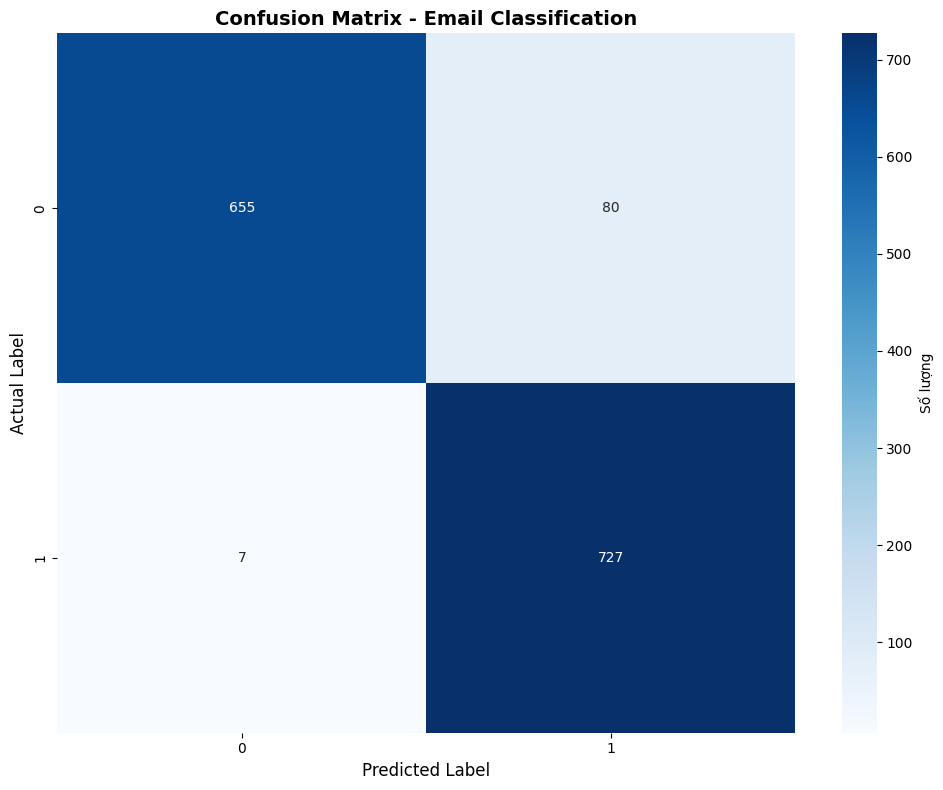


 Confusion Matrix đã được vẽ!


In [15]:
# Import thư viện cần thiết cho visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("\nCONFUSION MATRIX")
print("=" * 50)

# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Lấy tên nhãn gốc
labels = label_encoder.classes_

print(f"\nConfusion Matrix:")
print(f"                Predicted")
print(f"              {labels[0]:>6}  {labels[1]:>6}")
print(f"Actual {labels[0]:>4}   {cm[0][0]:>6}  {cm[0][1]:>6}")
print(f"       {labels[1]:>4}   {cm[1][0]:>6}  {cm[1][1]:>6}")

# Tính các chỉ số từ confusion matrix
tn, fp, fn, tp = cm.ravel()

print(f"\nGiải thích:")
print(f"   True Negative (TN):  {tn:,} - Dự đoán đúng Ham")
print(f"   False Positive (FP): {fp:,} - Ham bị nhận nhầm là Spam")
print(f"   False Negative (FN): {fn:,} - Spam bị nhận nhầm là Ham")
print(f"   True Positive (TP):  {tp:,} - Dự đoán đúng Spam")

# Vẽ confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels,
            cbar_kws={'label': 'Số lượng'})
plt.title("Confusion Matrix - Email Classification", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n Confusion Matrix đã được vẽ!")


ROC CURVE (Receiver Operating Characteristic)

AUC Score: 0.9901

Giải thích AUC:
Xuất sắc (0.9-1.0)

Ý nghĩa:
   - AUC = 1.0: Mô hình hoàn hảo
   - AUC = 0.5: Mô hình ngẫu nhiên (như tung đồng xu)
   - AUC > 0.5: Mô hình có khả năng phân loại


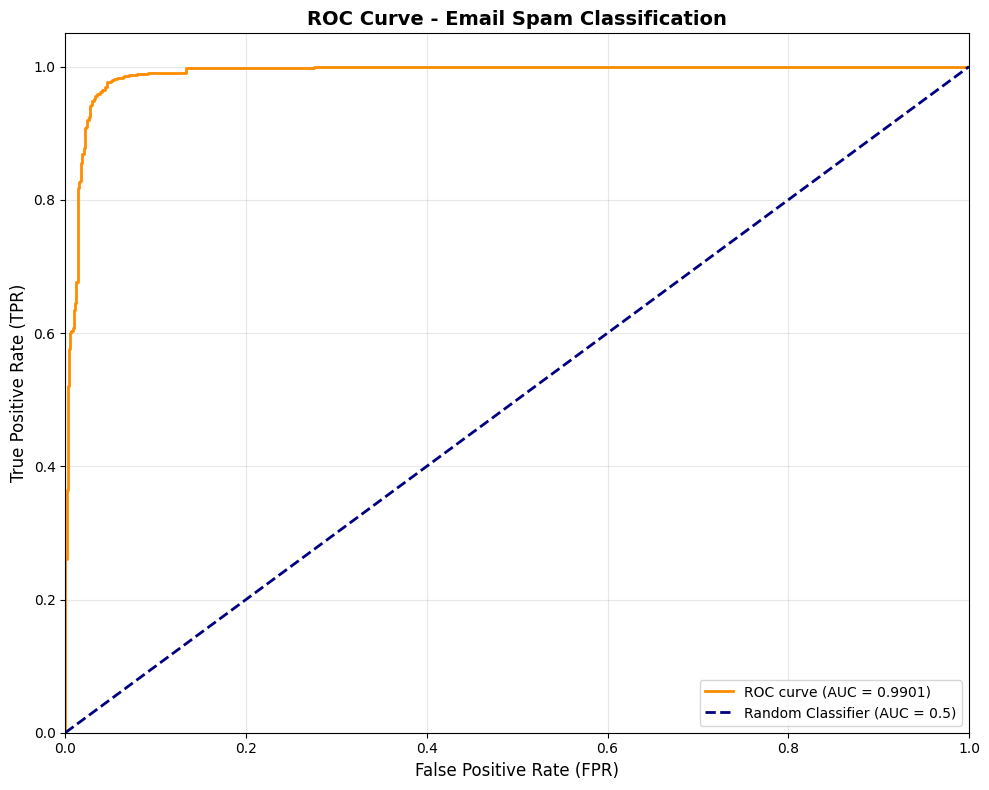


ROC Curve đã được vẽ!

CÁC CHỈ SỐ BỔ SUNG:
   - Precision: 0.9009 (90.09%)
     Trong số email dự đoán là Spam, 90.1% thực sự là Spam

   - Recall: 0.9905 (99.05%)
     Phát hiện được 99.0% email Spam thực tế

   - F1-Score: 0.9435
     Trung bình điều hòa của Precision và Recall


In [16]:
# Import thư viện cần thiết cho ROC curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

print("\nROC CURVE (Receiver Operating Characteristic)")
print("=" * 50)

# Lấy xác suất cho lớp positive (Spam = 1)
y_proba_positive = y_proba[:, 1]

# Tính ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_positive)
roc_auc = auc(fpr, tpr)

print(f"\nAUC Score: {roc_auc:.4f}")
print(f"\nGiải thích AUC:")
if roc_auc >= 0.9:
    print("Xuất sắc (0.9-1.0)")
elif roc_auc >= 0.8:
    print("Tốt (0.8-0.9)")
elif roc_auc >= 0.7:
    print("Khá (0.7-0.8)")
else:
    print("Cần cải thiện (<0.7)")

print(f"\nÝ nghĩa:")
print(f"   - AUC = 1.0: Mô hình hoàn hảo")
print(f"   - AUC = 0.5: Mô hình ngẫu nhiên (như tung đồng xu)")
print(f"   - AUC > 0.5: Mô hình có khả năng phân loại")

# Vẽ ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve - Email Spam Classification', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nROC Curve đã được vẽ!")

# Tính thêm các metrics khác
print(f"\nCÁC CHỈ SỐ BỔ SUNG:")
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"   - Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"     Trong số email dự đoán là Spam, {precision*100:.1f}% thực sự là Spam")
print(f"\n   - Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"     Phát hiện được {recall*100:.1f}% email Spam thực tế")
print(f"\n   - F1-Score: {f1:.4f}")
print(f"     Trung bình điều hòa của Precision và Recall")



TOP 20 TỪ KHÓA QUAN TRỌNG NHẤT CHO SPAM

Top 20 từ khóa đặc trưng cho Spam:
    1. 'e': -3.1239
    2. 't': -3.4877
    3. 'o': -3.5027
    4. 'a': -3.5256
    5. 'i': -3.6087
    6. 'r': -3.6587
    7. 'n': -3.7172
    8. 's': -3.7835
    9. 'l': -4.0305
   10. 'c': -4.1250
   11. 'u': -4.2716
   12. 'd': -4.3173
   13. 'h': -4.3427
   14. 'm': -4.4604
   15. 'p': -4.5273
   16. 'g': -4.7002
   17. 'y': -4.7159
   18. 'b': -4.7246
   19. 'f': -4.7951
   20. 'w': -4.8155


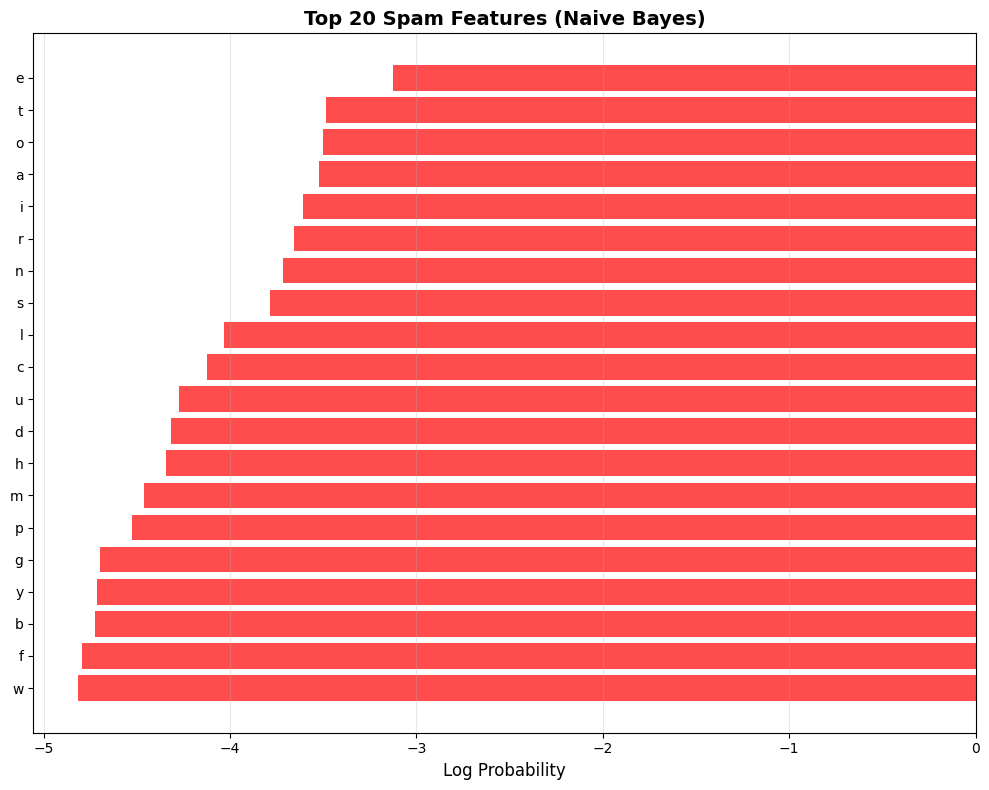


 Những từ này có xác suất cao nhất xuất hiện trong email Spam
 Mô hình Naive Bayes sử dụng chúng để phân loại email


In [17]:
import matplotlib.pyplot as plt
import numpy as np

print("\nTOP 20 TỪ KHÓA QUAN TRỌNG NHẤT CHO SPAM")
print("=" * 50)

# Lấy tên các đặc trưng từ df_clean
feature_names = df_clean.columns[1:-1]  # Bỏ Email No. và Prediction

# Lấy log probability của lớp Spam (lớp 1)
log_prob = model.feature_log_prob_[1]

# Tìm 20 từ khóa có probability cao nhất
top_idx = np.argsort(log_prob)[-20:]

print("\nTop 20 từ khóa đặc trưng cho Spam:")
for i, idx in enumerate(top_idx[::-1], 1):
    word = feature_names[idx]
    prob = log_prob[idx]
    print(f"   {i:2d}. '{word}': {prob:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
plt.barh(range(20), log_prob[top_idx], color='red', alpha=0.7)
plt.yticks(range(20), [feature_names[i] for i in top_idx])
plt.xlabel('Log Probability', fontsize=12)
plt.title('Top 20 Spam Features (Naive Bayes)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n Những từ này có xác suất cao nhất xuất hiện trong email Spam")
print(" Mô hình Naive Bayes sử dụng chúng để phân loại email")

In [19]:
from sklearn.metrics import classification_report

print("\nBÁO CÁO PHÂN LOẠI CHI TIẾT (CLASSIFICATION REPORT)")
print("=" * 50)

# Lấy tên nhãn dạng string
target_names = [str(cls) for cls in label_encoder.classes_]

# In classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nGiải thích các chỉ số:")
print("   - Precision: Độ chính xác của dự đoán cho mỗi lớp")
print("   - Recall: Tỷ lệ phát hiện đúng của mỗi lớp")
print("   - F1-Score: Trung bình điều hòa của Precision và Recall")
print("   - Support: Số lượng mẫu thực tế của mỗi lớp trong tập test")

print("\n Macro avg: Trung bình không trọng số của các lớp")
print(" Weighted avg: Trung bình có trọng số theo số lượng mẫu")


BÁO CÁO PHÂN LOẠI CHI TIẾT (CLASSIFICATION REPORT)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       735
           1       0.90      0.99      0.94       734

    accuracy                           0.94      1469
   macro avg       0.95      0.94      0.94      1469
weighted avg       0.95      0.94      0.94      1469


Giải thích các chỉ số:
   - Precision: Độ chính xác của dự đoán cho mỗi lớp
   - Recall: Tỷ lệ phát hiện đúng của mỗi lớp
   - F1-Score: Trung bình điều hòa của Precision và Recall
   - Support: Số lượng mẫu thực tế của mỗi lớp trong tập test

 Macro avg: Trung bình không trọng số của các lớp
 Weighted avg: Trung bình có trọng số theo số lượng mẫu
